Iteration 10/200, Best fitness: 0.8042
Best parameters: rho=18.6710, sigma=0.9711, C=14.9012
Iteration 20/200, Best fitness: 0.8333
Best parameters: rho=19.4653, sigma=0.7479, C=13.4587
Iteration 30/200, Best fitness: 0.8500
Best parameters: rho=19.6349, sigma=0.7389, C=13.3867
Iteration 40/200, Best fitness: 0.8500
Best parameters: rho=19.6349, sigma=0.7389, C=13.3867
Iteration 50/200, Best fitness: 0.8500
Best parameters: rho=19.6349, sigma=0.7389, C=13.3867
Iteration 60/200, Best fitness: 0.8542
Best parameters: rho=19.6349, sigma=0.7548, C=13.3081
Iteration 70/200, Best fitness: 0.8542
Best parameters: rho=19.6349, sigma=0.7548, C=13.3081
Iteration 80/200, Best fitness: 0.8542
Best parameters: rho=19.6349, sigma=0.7548, C=13.3081
Iteration 90/200, Best fitness: 0.8542
Best parameters: rho=19.6349, sigma=0.7548, C=13.3081
Iteration 100/200, Best fitness: 0.8542
Best parameters: rho=19.6349, sigma=0.7548, C=13.3081
Iteration 110/200, Best fitness: 0.8542
Best parameters: rho=19.6349,

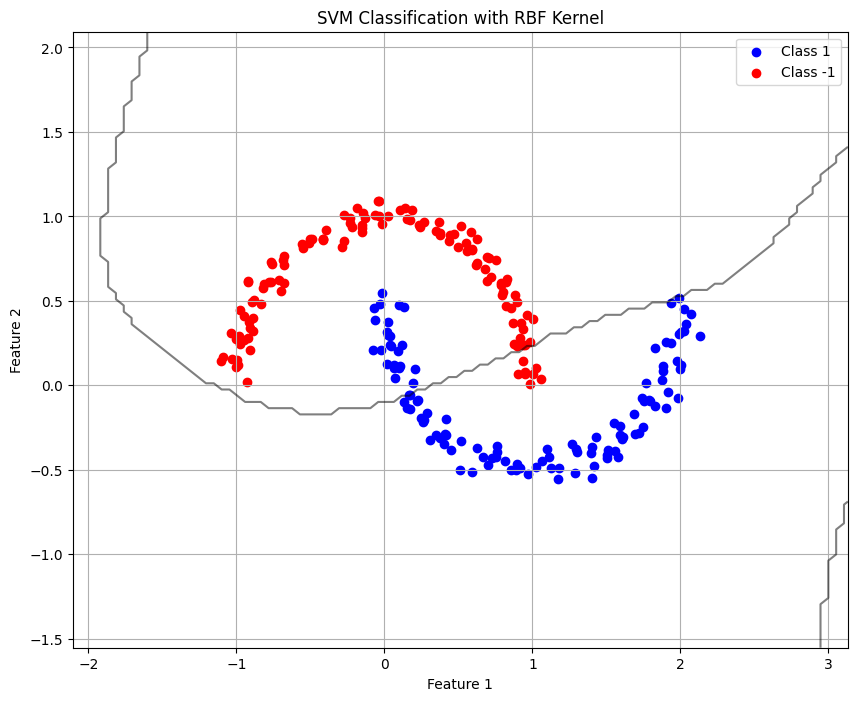

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from svm import SVM
from sklearn.datasets import make_moons 
from sklearn.model_selection import train_test_split
# Generate synthetic data for binary classification


# Create two clusters of points
# Generate synthetic data for binary classification using make_moons
n_samples = 300
X, y = make_moons(n_samples=n_samples, noise=0.05, random_state=42)  # Create tougher samples

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for i in range(len(y)):
    if y[i] == 0:
        y[i] = -1
# Create and train SVM model
svm_model = SVM(kernel_type='rbf', epochs=100)
svm_model.pso_settings(pso_max_iter = 200,
                        pso_n_particles=10,
                        pso_w=0.72984,              # Slightly higher inertia
                        pso_c1=2.05,             # Increase cognitive parameter
                        pso_c2=2.05, 
                        admm_max_iter=100)
svm_model.train(X, y,3000)




# Make predictions
y_pred = svm_model.predict(X)

# Calculate accuracy
train_accuracy = svm_model.score(X, y)
test_accuracy = svm_model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Visualize the results
plt.figure(figsize=(10, 8))

# Plot training points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', label='Class 1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='red', label='Class -1')

# Create a mesh grid to visualize decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Get predictions for mesh grid points
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification with RBF Kernel')
plt.legend()
plt.grid(True)
plt.show()